<a href="https://colab.research.google.com/github/manoj-dotcom/Deep-Learning/blob/main/DL_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#2.Design a neural network for predicting house prices using Boston Housing Price dataset

In [ ]:
#Importing the pandas for data processing and numpy for numerical computing
import numpy as np
import pandas as pd
# Importing the Boston Housing dataset from the sklearn
from sklearn.datasets import load_boston
boston = load_boston()
#Converting the data into pandas dataframe
data = pd.DataFrame(boston.data)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#First look at the data
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
data.keys()

RangeIndex(start=0, stop=13, step=1)

In [ ]:
print(data.shape)

(506, 13)


In [ ]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names
#Adding the target variable to the dataset
data['PRICE'] = boston.target 
#Looking at the data with names and target variable
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Shape of the data
print(data.shape)

(506, 14)


In [ ]:
#Checking the null values in the dataset
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
#Checking the statistics of the data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.shape

(506, 14)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


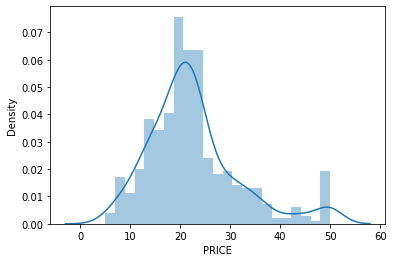

In [ ]:
##checking the distribution of the target variable
import seaborn as sns
sns.distplot(data.PRICE)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


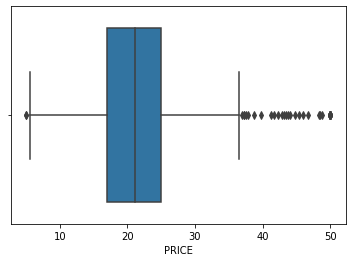

In [ ]:
#Distribution using box plot
sns.boxplot(data.PRICE)

In [ ]:
#checking Correlation of the data 
correlation = data.corr()
correlation.loc['PRICE']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

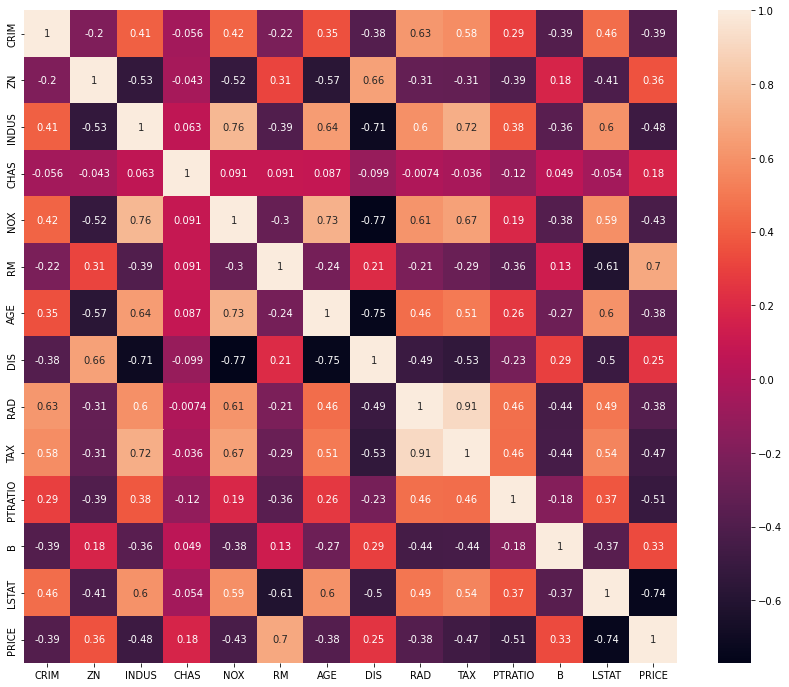

In [ ]:
# plotting the heatmap
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

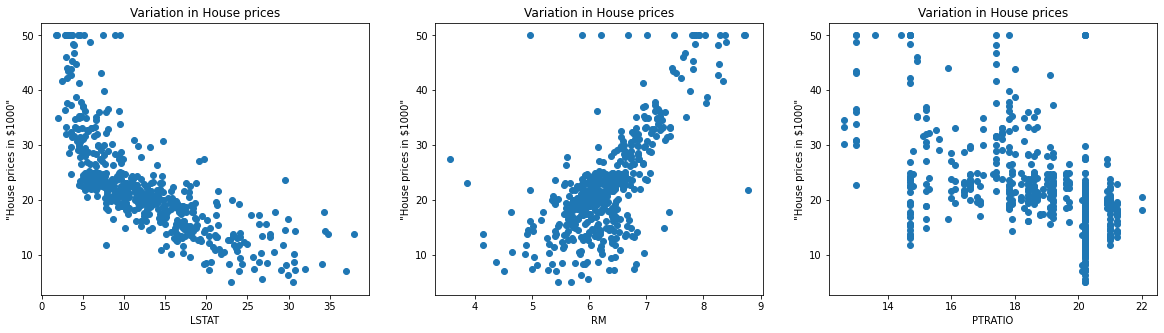

In [ ]:
# Checking the scatter plot with the most correlated features
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = data.PRICE
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [ ]:
#X = data[['LSTAT','RM','PTRATIO']]
X = data.iloc[:,:-1]
y= data.PRICE

In [ ]:
# Splitting the data into train and test for building the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [ ]:
X_train # before standardization

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
138,0.24980,0.0,21.89,0.0,0.624,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
197,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61
439,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88
174,0.08447,0.0,4.05,0.0,0.510,5.859,68.7,2.7019,5.0,296.0,16.6,393.23,9.64


In [ ]:
#Scaling the dataset using standard scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train # after standardization

array([[-0.42744775,  1.48401136, -1.11423904, ..., -1.50968688,
         0.36523284, -1.37446434],
       [-0.40822245, -0.47990686,  1.574679  , ...,  1.2574065 ,
         0.38257733,  1.18233241],
       [-0.4124302 ,  0.48023094, -0.76154626, ...,  0.28892382,
         0.21506311, -1.27468691],
       ...,
       [ 0.66885021, -0.47990686,  1.02232131, ...,  0.79622427,
         0.4369607 ,  1.39851685],
       [-0.42770344, -0.47990686, -1.02533714, ..., -0.86403176,
         0.39589342, -0.4362793 ],
       [-0.42669953, -0.47990686,  2.12266447, ...,  0.28892382,
         0.2264769 ,  0.71254699]])

In [ ]:
#Creating the neural network model
from tensorflow.keras.layers import Input
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13)) # this is input layer
model.add(Dense(64,activation  = 'relu')) # these 3 are hidden layers
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))

model.add(Dense(1)) # this is output layer
# optimizers are used to change the values of the nertwork such as weights and learning rate to minimize the loss.
# The results of the Adam optimizer are generally better than every other optimization algorithms, 
#have faster computation time, and require fewer parameters for tuning. Because of all that,
#Adam is recommended as the default optimizer for most of the applications.
# ADAM means The Adaptive Movement Estimation algorithm which automatically adopts the learning rate of the variable.
# Here loss is mentioned in the form of mean squared error. It is the average squared difference between the
# observed and predicted values.
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 528.3635
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 412.4323
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 200.0970
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 80.9284
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 45.0546
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 31.6667
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 25.3049
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 22.1789
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 19.8774
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 18.7781
Epoch 11/100
13/13 [==============================] - 0s 1ms/step - loss: 17.4519
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 16.8798
Epoch 13/100
13/13 [==

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)#r2 score is also known as accuarcy score
print(r2)

0.9089475011538372


In [ ]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error # mean squared error means calculating loss
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)
# printing the root mean squared error value

2.90822901294703
